In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb
from mplsoccer import Pitch

In [3]:
leicester_matches = sb.matches(competition_id = 2, season_id = 27)
leicester_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3754020,2015-08-17,21:00:00.000,England - Premier League,2015/2016,Liverpool,AFC Bournemouth,1,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Anfield,Craig Pawson,Brendan Rodgers,Eddie Howe,1.1.0,2,2
376,3754267,2015-08-15,16:00:00.000,England - Premier League,2015/2016,Watford,West Bromwich Albion,0,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Vicarage Road,Paul Tierney,Enrique Sánchez Flores,Tony Pulis,1.1.0,2,2
377,3754141,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Arsenal,West Ham United,0,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Emirates Stadium,Martin Atkinson,Arsène Wenger,Slaven Bilić,1.1.0,2,2
378,3754128,2015-08-08,16:00:00.000,England - Premier League,2015/2016,AFC Bournemouth,Aston Villa,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Vitality Stadium,Mark Clattenburg,Eddie Howe,Tim Sherwood,1.1.0,2,2


In [5]:
#create a variable for the team you want to look into
team="Leicester City"

#filter for only matches that the focus team played in
matches_df = leicester_matches[(leicester_matches['home_team'] == team)|(leicester_matches['away_team'] == team)]

In [11]:
matches_df.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
8,3754045,2015-12-29,20:45:00.000,England - Premier League,2015/2016,Leicester City,Manchester City,0,0,available,...,2021-06-12T16:17:31.694,19,Regular Season,King Power Stadium,Craig Pawson,Claudio Ranieri,Manuel Luis Pellegrini Ripamonti,1.1.0,2,2
10,3754049,2016-02-27,16:00:00.000,England - Premier League,2015/2016,Leicester City,Norwich City,1,0,available,...,2021-06-12T16:17:31.694,27,Regular Season,King Power Stadium,Neil Swarbrick,Claudio Ranieri,Alex Neil,1.1.0,2,2
21,3754146,2015-09-19,16:00:00.000,England - Premier League,2015/2016,Stoke City,Leicester City,2,2,available,...,2021-06-13T16:17:31.694,6,Regular Season,bet365 Stadium,Andre Marriner,Mark Hughes,Claudio Ranieri,1.1.0,2,2
40,3754006,2015-10-31,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Leicester City,2,3,available,...,2021-06-13T16:17:31.694,11,Regular Season,The Hawthorns,Anthony Taylor,Tony Pulis,Claudio Ranieri,1.1.0,2,2


In [15]:
combined_data = []
for match_id in matches_df.match_id:
    events = sb.events(match_id=match_id)
    combined_data.append(events)


In [25]:
df = pd.concat(combined_data)
df.head()

,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,...,pass_goal_assist,pass_straight,shot_deflected,goalkeeper_lost_out,goalkeeper_shot_saved_off_target,shot_saved_off_target,block_save_block,goalkeeper_shot_saved_to_post,goalkeeper_success_in_play,shot_saved_to_post
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.player.unique()

array([nan, 'Dan Gosling', 'Joshua King', 'Andrew Surman', 'Adam Smith',
       'Simon Francis', 'Steve Cook', 'Charlie Daniels', 'Danny Simpson',
       'Robert Huth', 'Matt Ritchie', 'Harry Arter', 'Artur Boruc',
       "N''Golo Kanté", 'Danny Drinkwater', 'Christian Fuchs',
       'Junior Stanislas', 'Jamie Vardy', 'Marc Albrighton',
       'José Leonardo Ulloa', 'Kasper Schmeichel', 'Wes Morgan',
       'Riyad Mahrez', 'Nathan Dyer', 'Glenn Murray', 'Shinji Okazaki',
       'Ritchie De Laet', 'Sylvain Distin', 'Fernando Luiz Rosa',
       'Nicolás Hernán Otamendi', 'Bacary Sagna',
       'Sergio Leonel Agüero del Castillo', 'David Josué Jiménez Silva',
       'Gnégnéri Yaya Touré', 'Eliaquim Mangala', 'Aleksandar Kolarov',
       'Kevin De Bruyne', 'Gökhan İnler', 'Raheem Sterling', 'Joe Hart',
       'Wilfried Guemiand Bony', 'Jesús Navas González',
       'Andrew Philip King', 'Kelechi Promise Iheanacho',
       'Jonathan Howson', 'Nathan Redmond', 'Alexander Banor Tettey',
     

In [209]:
df_player = df[df['player'] == "Riyad Mahrez"]   #"N''Golo Kanté"

In [211]:
df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Dispossessed', 'Duel', 'Shot', 'Block', 'Goal Keeper',
       'Ball Recovery', 'Miscontrol', 'Clearance', 'Dribbled Past',
       'Dribble', 'Interception', 'Foul Committed', 'Foul Won',
       'Half End', 'Substitution', 'Injury Stoppage', 'Tactical Shift',
       'Shield', 'Referee Ball-Drop', '50/50', 'Bad Behaviour', 'Error',
       'Player Off', 'Player On', 'Offside', 'Own Goal For',
       'Own Goal Against'], dtype=object)

In [241]:
#separate start and end locations from coordinates
df_player[['x', 'y']] = df_player['location'].apply(pd.Series)
df_player[['pass_end_x', 'pass_end_y']] = df_player['pass_end_location'].apply(pd.Series)
df_player[['carry_end_x', 'carry_end_y']] = df_player['carry_end_location'].apply(pd.Series)

/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_91917/178906082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player[['x', 'y']] = df_player['location'].apply(pd.Series)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_91917/178906082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player[['pass_end_x', 'pass_end_y']] = df_player['pass_end_location'].apply(pd.Series)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_91917/178906082.py:3: SettingWithCopyWarning: 

In [263]:
# Filter the events for specific event types
filtered_player_events = df_player[df_player['type'].isin([
    'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Dispossessed', 'Duel', 'Shot', 'Block',
       'Ball Recovery', 'Miscontrol', 'Clearance','Dribble',
        'Interception', 'Foul Committed', 'Foul Won', 'carry_end_x', 'carry_end_y', 'pass_end_x', 'pass_end_y' 
])]

# Select specific columns
player_df = filtered_player_events[['player', 'team', 'position', 'type', 'x', 'y', 'carry_end_x', 'carry_end_y', 'pass_end_x', 'pass_end_y', 'shot_statsbomb_xg']]

player_df

,player,team,position,type,x,y,carry_end_x,carry_end_y,pass_end_x,pass_end_y,shot_statsbomb_xg
145,Riyad Mahrez,Leicester City,Right Midfield,Pass,79.2,67.1,NaN,NaN,82.4,55.5,NaN
183,Riyad Mahrez,Leicester City,Right Midfield,Pass,65.5,70.1,NaN,NaN,80.1,64.5,NaN
192,Riyad Mahrez,Leicester City,Right Midfield,Pass,87.1,23.5,NaN,NaN,93.3,0.8,NaN
208,Riyad Mahrez,Leicester City,Right Midfield,Pass,52.7,66.9,NaN,NaN,56.7,61.8,NaN
210,Riyad Mahrez,Leicester City,Right Midfield,Pass,51.6,59.8,NaN,NaN,43.1,53.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3128,Riyad Mahrez,Leicester City,Right Midfield,Foul Won,87.8,75.2,NaN,NaN,NaN,NaN,NaN
3131,Riyad Mahrez,Leicester City,Right Midfield,Foul Won,91.2,64.4,NaN,NaN,NaN,NaN,NaN
3136,Riyad Mahrez,Leicester City,Right Midfield,Block,57.2,53.2,NaN,NaN,NaN,NaN,NaN
3192,Riyad Mahrez,Leicester City,Right Midfield,Shot,112.1,38.7,NaN,NaN,NaN,NaN,0.169842


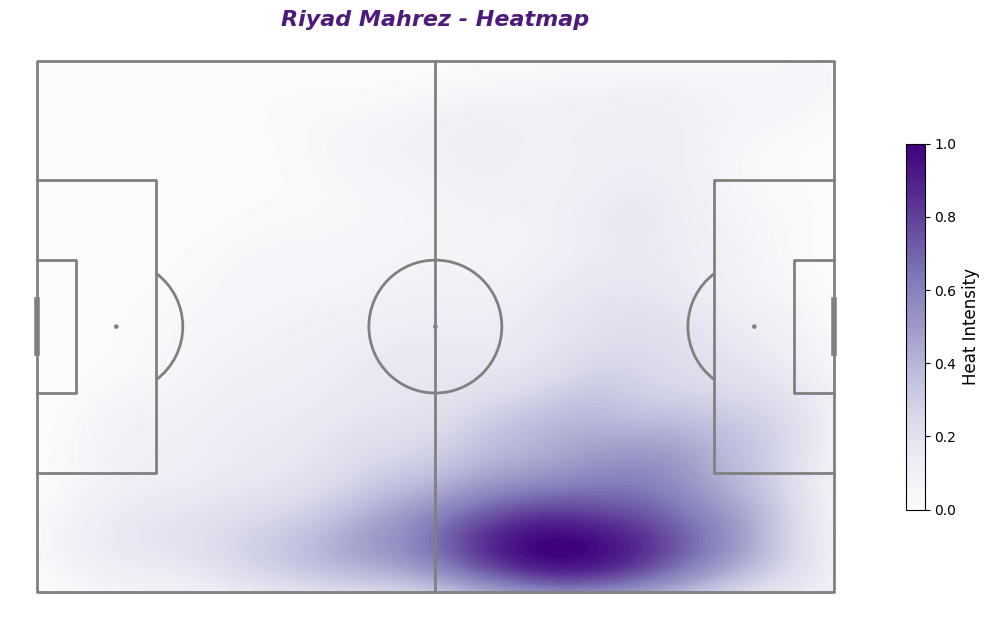

In [265]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import numpy as np

# Initialize pitch and figure
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='grey', line_zorder=2)  # Ensure pitch lines stay visible
fig, ax = pitch.draw(figsize=(10, 7))

# Plot the kdeplot with reduced opacity for visibility
kde = pitch.kdeplot(
    player_df.x,
    player_df.y,
    fill=True,
    thresh=0,
    n_levels=100,
    cmap='Purples',  # Adjust transparency for better pitch visibility
    ax=ax
)

# Adding the colorbar without affecting the pitch
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Create a normalization and colormap for the colorbar
norm = mcolors.Normalize(vmin=0, vmax=1)  # Adjust the range if needed
sm = cm.ScalarMappable(cmap='Purples', norm=norm)
sm.set_array([])

# Add the color bar beside the pitch
cbar = plt.colorbar(sm, ax=ax, fraction=0.02, pad=0.05)
cbar.set_label('Heat Intensity', fontsize=12)

# Adding a title
ax.set_title("Riyad Mahrez - Heatmap", fontsize=16, fontfamily='DejaVu Sans',
             fontstyle='italic', fontweight='bold', c='#4e1a7b') #000555 #034e7b  #4e1a7b

plt.show()


In [239]:
# Save the figure to a file
fig.savefig('/Users/Trymso/Desktop/Mahrez_heatmap.png', dpi=300, bbox_inches='tight')

In [259]:
df_player.shot_outcome.unique()

array([nan, 'Off T', 'Saved', 'Blocked', 'Goal', 'Post', 'Wayward'],
      dtype=object)

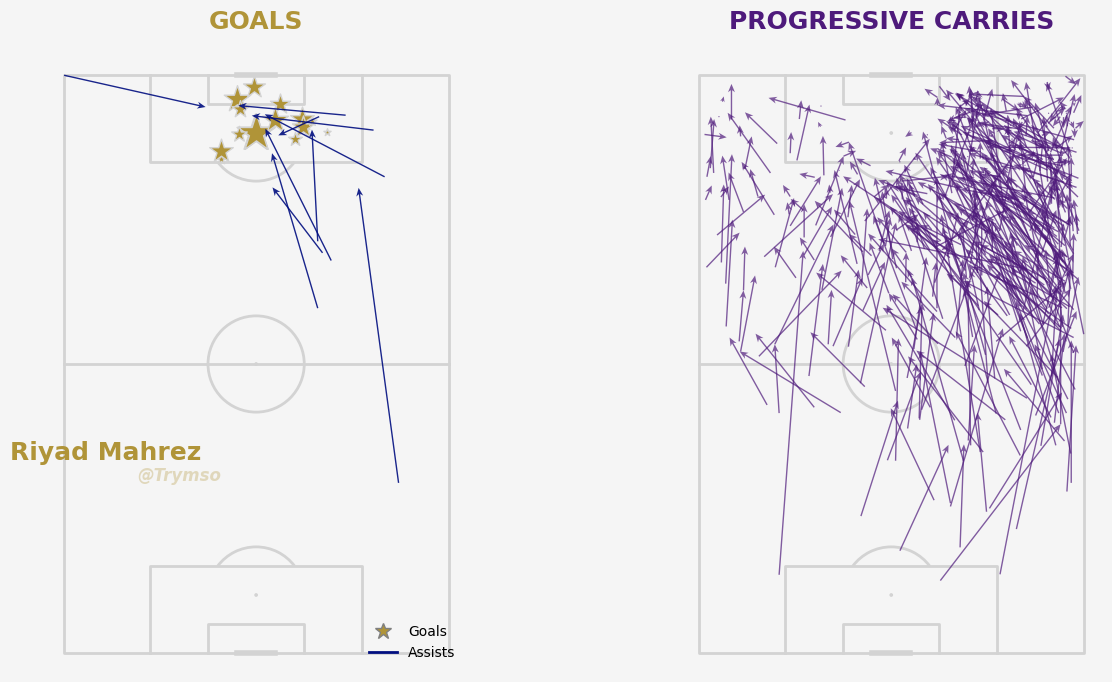

In [321]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

# Create the pitch with similar design
pitch = VerticalPitch(
    pitch_type='statsbomb', 
    pitch_color='#f5f5f5', 
    line_color='#d3d3d3', 
    line_zorder=1
)

# Set up a grid layout for two pitches with reduced width and minimal spacing
fig, axs = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'wspace': 0.05})  # Adjusted width and wspace
fig.set_facecolor('#f5f5f5')

# === PITCH 1: Key Passes and Through Balls === #
# Filter the dataframe for key passes and through balls
goals = df_player[
    (df_player['type'] == 'Shot') & 
    (df_player['shot_outcome'] == 'Goal')
]
assist_balls = df_player[
    (df_player['type'] == 'Pass') & 
    (df_player['pass_goal_assist'] == True)
]

# Draw the first pitch
pitch.draw(ax=axs[0])

# Plot Key Passes
for _, row in goals.iterrows():
    pitch.scatter(
            x=row['x'], y=row['y'], ax=axs[0],
            s=1000 * (row['shot_statsbomb_xg'] if not pd.isna(row['shot_statsbomb_xg']) else 0.1), 
            color='#B09438', edgecolor='#d3d3d3', zorder=3, marker='*'
    )

# Plot Through Balls
for _, row in assist_balls.iterrows():
    pitch.arrows(
        xstart=row['x'], ystart=row['y'], 
        xend=row['pass_end_x'], yend=row['pass_end_y'], 
        ax=axs[0], color='#010E80', width=1, headwidth=5, headlength=6, lw=2, 
        alpha=0.9, linestyle='-', zorder=3
    )

# Add a title to the first pitch
axs[0].set_title(
    "GOALS",
    fontsize=18, 
    fontweight='bold', 
    fontfamily='DejaVu Sans', 
    color='#B09438', #000555
    pad=20
)

# === PITCH 2: Progressive Carries === #
# Filter the dataframe for progressive carries
progressive_carries = df_player[
    (df_player['type'] == 'Carry') & 
    (df_player['x'].notna()) & 
    (df_player['y'].notna()) & 
    (df_player['carry_end_x'].notna()) & 
    (df_player['carry_end_y'].notna()) &
    ((df_player['carry_end_x'] - df_player['x']) >= 0.25 * (100 - df_player['x']))  # Progressive condition
]

# Draw the second pitch
pitch.draw(ax=axs[1])

# Plot Progressive Carries
for _, row in progressive_carries.iterrows():
    pitch.arrows(
        xstart=row['x'], ystart=row['y'], 
        xend=row['carry_end_x'], yend=row['carry_end_y'], 
        ax=axs[1], color='#4e1a7b', width=1, headwidth=5, headlength=6, lw=2, 
        alpha=0.7, zorder=2
    )

# Add a title to the second pitch
axs[1].set_title(
    "PROGRESSIVE CARRIES",
    fontsize=18, 
    fontweight='bold',
    fontfamily='DejaVu Sans', 
    color='#4e1a7b', 
    pad=20
)

# Add legends to both pitches
legend_elements_1 = [
    plt.Line2D([0], [0], color='#B09438', lw=2, label='Goals', marker='*', markersize=12, linestyle='', markeredgecolor='grey'),
    plt.Line2D([0], [0], color='#010E80', lw=2, label='Assists'),
]
axs[0].legend(handles=legend_elements_1, loc='lower right', fontsize=10, frameon=False)

#legend_elements_2 = [
    #plt.Line2D([0], [0], color='#4e1a7b', lw=2, label='Progressive Carry'),
#]
#axs[1].legend(handles=legend_elements_2, loc='lower right', fontsize=10, frameon=False)

# Add a centered title
fig.suptitle(
    "Riyad Mahrez", 
    fontsize=18, 
    fontweight='bold', 
    fontfamily='DejaVu Sans', 
    color='#B09438',  # Gold color
    x=0.22, #0.51
    y=0.40  # Adjust the vertical position #.57
)

# Add Twitter handle
fig.text(
    0.24, #0.52
    0.35, # 0.50
    '@Trymso', 
    fontsize=12, 
    fontstyle='italic',
    fontweight='bold',
    fontfamily='DejaVu Sans', 
    color='#B09438',
    alpha=.3
)

# Show the plot
plt.show()

In [319]:
# Save the figure to a file
fig.savefig('/Users/Trymso/Desktop/Mahrez_actions.png', dpi=300, bbox_inches='tight')